In [1]:
library(data.table)
library(reshape2)
library(dplyr)
library(ggplot2)
library(plyr)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [2]:
atac_nmf = fread("../fibroblast_reanalysis_ATACseq_cNMF/data/ATACseq_cNMF_usage_k14.csv")
rna_nmf = fread("../fibroblast_reanalysis_RNAseq_cNMF/data/RNAseq_cNMF_usage_k17.csv")

In [3]:
#atac_nmf_long = melt(atac_nmf, value.name="usage")

Using index, annot1 as id variables



In [4]:
#atac_nmf_long

In [5]:
atac_nmf_long = melt(atac_nmf, value.name="usage")
atac_nmf_long = dplyr::rename(atac_nmf_long, factor="variable")
atac_nmf_long$type = "scATAC_peaks"

Using index, annot1 as id variables



In [6]:
rna_nmf_long = melt(rna_nmf, value.name="usage")
rna_nmf_long = dplyr::rename(rna_nmf_long, factor="variable")
rna_nmf_long$type = "scRNA"

Using index, annot1 as id variables



In [7]:
#rna_nmf_long
#atac_nmf_long

In [8]:
d = rbind(rna_nmf_long, atac_nmf_long)

# Reordre cell type
d$annot1 = factor(d$annot1, levels=c("S1", "S2", "S3", "S3x", "S4", "S5", "MF1", "MF2", "PC"))

d$type = factor(d$type, levels=c("scRNA", "scATAC_peaks"))

In [9]:
# matplotlib color sscheme used for UMAP plots elsewhere
tab10_colors = c(
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf"
)

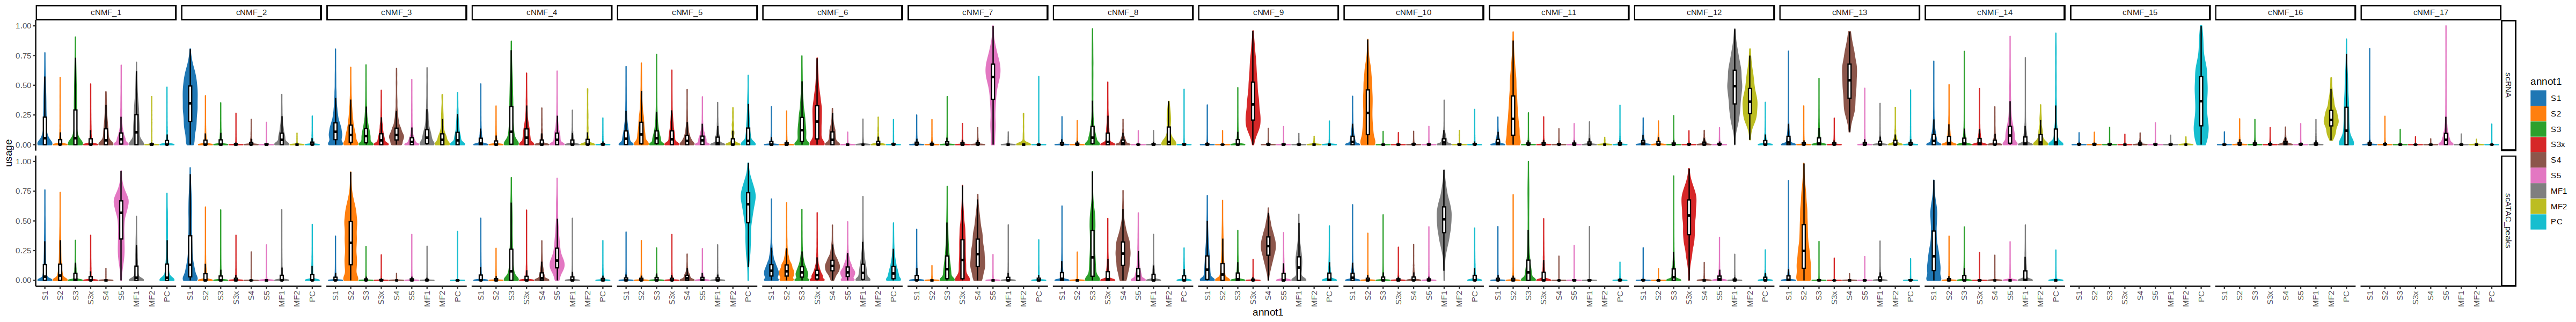

In [10]:
width = 40
height = 5
options(repr.plot.width=width, repr.plot.height=height)

ggplot(d, aes(
        x=annot1,
        y=usage,
        fill=annot1, col=annot1)
    ) +
    facet_grid(type~factor) +
    geom_violin(scale="width", lwd=0.5) +  # normalize each shape to max width
    #geom_violin(scale="count") +
    geom_boxplot(width=0.2, fill="white", col="black", lwd=0.5, outlier.shape=NA) +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values=tab10_colors[-5]) +  # without purple
    scale_color_manual(values=tab10_colors[-5]) +  # without purple 
    #theme_minimal() +
    theme_classic() +
    theme(
        # Vertical x-axis labels
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
    )

ggsave("plots/cNMF_RNA_ATAC_violinplots.pdf", width=width, height=height)

In [11]:
# Repeat plot showing specific factors

In [12]:
# match corresponding cNMF factors between ATAC and RNA
rna_nmf_long$plot_group = revalue(rna_nmf_long$factor, c("cNMF_7"="cNMF_7.1", "cNMF_4"="cNMF_4.4", "cNMF_10"="cNMF_10.3", "cNMF_15"="cNMF_15.5", "cNMF_2"="cNMF_2.14", "cNMF_9"="cNMF_9.12"))
atac_nmf_long$plot_group = revalue(atac_nmf_long$factor, c("cNMF_1"="cNMF_7.1", "cNMF_4"="cNMF_4.4", "cNMF_3"="cNMF_10.3", "cNMF_5"="cNMF_15.5", "cNMF_14"="cNMF_2.14", "cNMF_12"="cNMF_9.12"))

In [13]:
d = rbind(rna_nmf_long, atac_nmf_long)

# Exclude
d = d[grepl("[.]", d$plot_group), ]

# Reorder plots
d$plot_group = factor(d$plot_group, levels=c("cNMF_7.1", "cNMF_4.4", "cNMF_2.14",  "cNMF_10.3", "cNMF_9.12", "cNMF_15.5"))

# Reordre cell type
d$annot1 = factor(d$annot1, levels=c("S1", "S2", "S3", "S3x", "S4", "S5", "MF1", "MF2", "PC"))

d$type = factor(d$type, levels=c("scRNA", "scATAC_peaks"))

In [14]:
# matplotlib color sscheme used for UMAP plots elsewhere
tab10_colors = c(
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf"
)

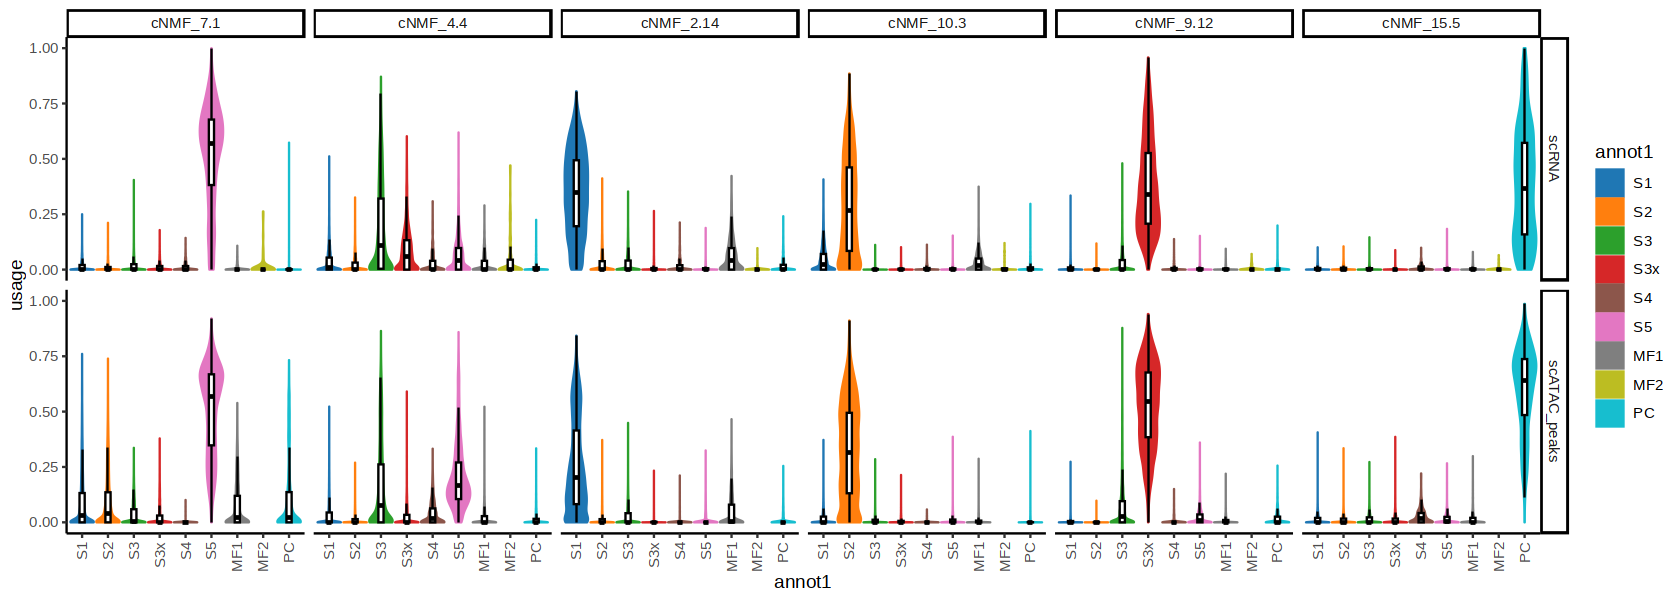

In [15]:
width = 14
height = 5
options(repr.plot.width=width, repr.plot.height=height)

ggplot(d, aes(
        x=annot1,
        y=usage,
        fill=annot1, col=annot1)
    ) +
    facet_grid(type~plot_group) +
    geom_violin(scale="width", lwd=0.5) +  # normalize each shape to max width
    geom_boxplot(width=0.2, fill="white", col="black", lwd=0.5, outlier.shape=NA) +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values=tab10_colors[-5]) +  # without purple
    scale_color_manual(values=tab10_colors[-5]) +  # without purple 
    #theme_minimal() +
    theme_classic() +
    theme(
        # Vertical x-axis labels
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
    )

ggsave("plots/cNMF_RNA_ATAC_violinplots_selected.pdf", width=width, height=height)

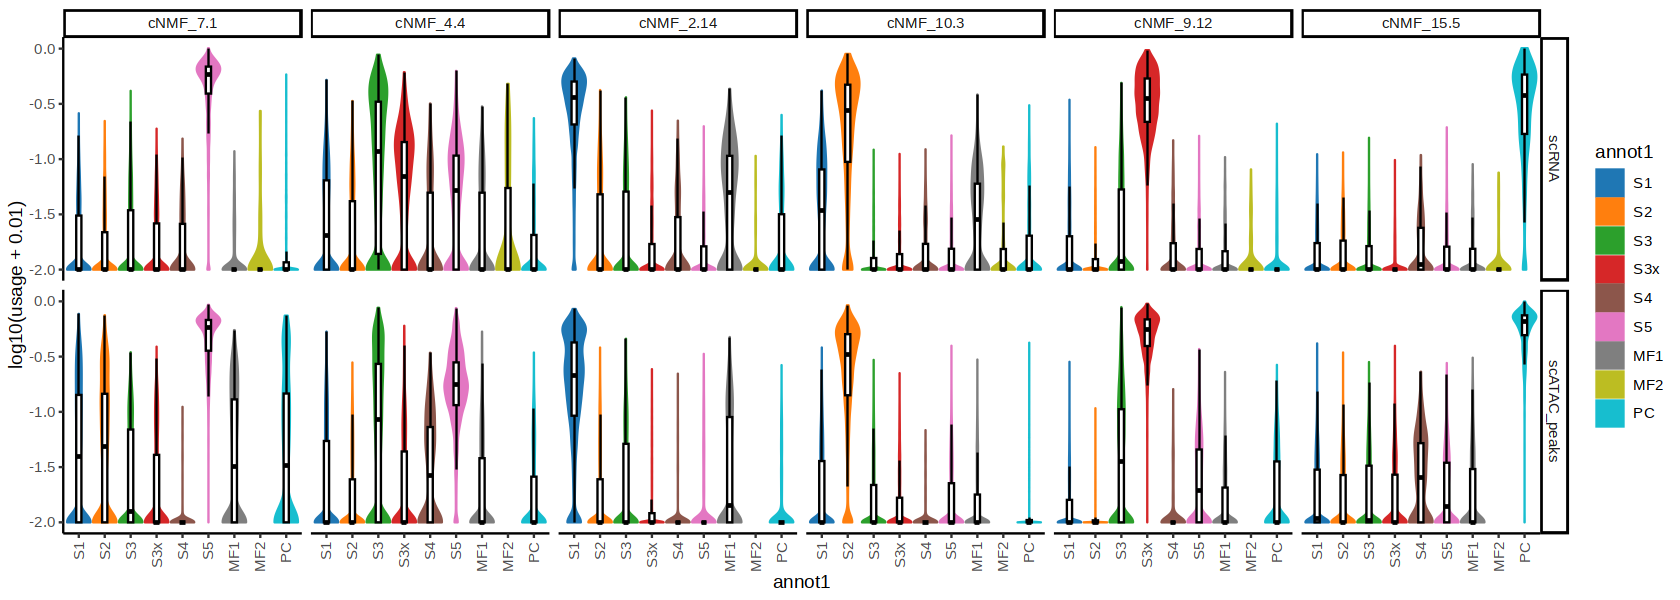

In [18]:
# Same as above but log transformed
width = 14
height = 5
options(repr.plot.width=width, repr.plot.height=height)

ggplot(d, aes(
        x=annot1,
        y=log10(usage + 0.01),
        fill=annot1, col=annot1)
    ) +
    facet_grid(type~plot_group) +
    geom_violin(scale="width", lwd=0.5) +  # normalize each shape to max width
    geom_boxplot(width=0.2, fill="white", col="black", lwd=0.5, outlier.shape=NA) +
    #coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values=tab10_colors[-5]) +  # without purple
    scale_color_manual(values=tab10_colors[-5]) +  # without purple 
    #scale_y_continuous(trans='log10') +
    #theme_minimal() +
    theme_classic() +
    theme(
        # Vertical x-axis labels
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
    )

ggsave("plots/cNMF_RNA_ATAC_violinplots_selected_log10.pdf", width=width, height=height)